## Tutorial 1:  Introduction

##### NumPy

In [0]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


##### matplotlib

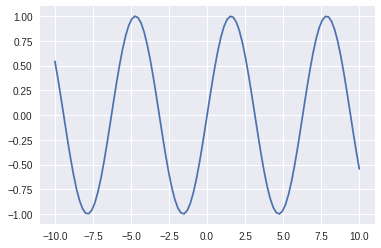

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# create a second array using sinus
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

##### pandas

In [0]:
import pandas as pd
from IPython.display import display

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


In [0]:
# One of many possible ways to query the table:
# selecting all rows that have an age column greate than 30
display(data_pandas[data_pandas.Age > 30])

,Age,Location,Name
2,53,Berlin,Peter
3,33,London,Linda


#### Versions 

In [18]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
pandas version: 0.22.0
matplotlib version: 3.0.2
NumPy version: 1.14.6
IPython version: 5.5.0
scikit-learn version: 0.20.2


### A First Application: Classifying iris species
<img src="https://github.com/IGSerebriiskii/SysBioShortCourse/blob/master/images/iris_petal_sepal.png?raw=1" width="300" height="300" />
#### Meet the data

In [0]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [9]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [10]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [4]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [5]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [7]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [8]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and testing data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [13]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [14]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


#### First things first: Look at your data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0f35bd198>,
      dtype=object)

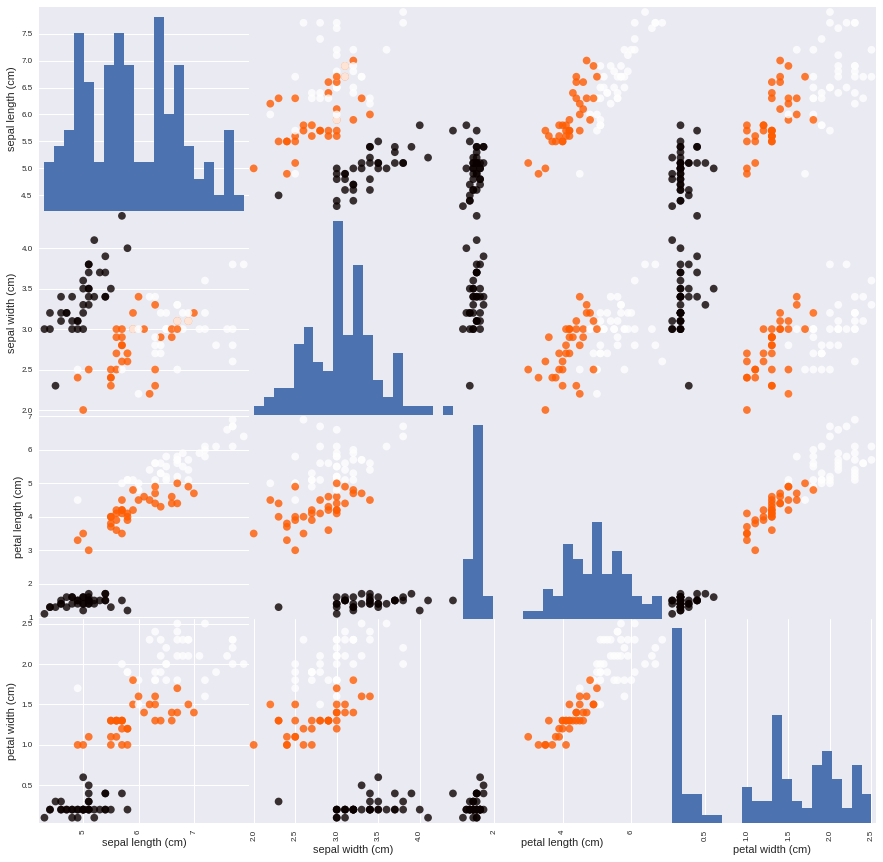

In [19]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.tools.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap='hot')

#### Building your first model: k nearest neighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

#### Making predictions

In [23]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [0]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating the model

In [24]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [25]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [26]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


it does the same thing as the prevous one but more directly using "score" function

### Summary and Outlook

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 1.00
Test set score: 0.97


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("Train set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Train set score: 0.96
Test set score: 0.97


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("Train set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Train set score: 0.95
Test set score: 0.95


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("Train set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Train set score: 0.97
Test set score: 0.92


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("Train set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Train set score: 0.97
Test set score: 0.97


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'])

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("Train set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Train set score: 0.98
Test set score: 0.97


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

print("Train set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Train set score: 0.97
Test set score: 0.97


### Exercise 1

#### 1. Calculate the score on testing data

#### 2. Rerun the predictor with difference choices of n_neighbors.  Compare test scores. Which number is the best?